In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from pmdarima import auto_arima

In [117]:
data = pd.Series(np.random.randint(100, 1000, size = 100))
data = data.values

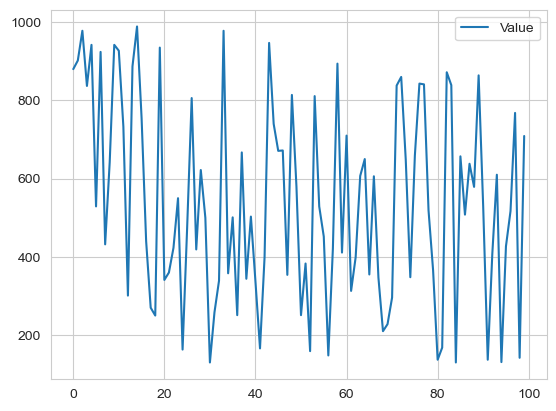

In [118]:
plt.plot(data, label = "Value")
plt.legend()
plt.show()

In [119]:
adfuller(data)

(-8.32367000335457,
 3.517232212010283e-13,
 0,
 99,
 {'1%': -3.498198082189098,
  '5%': -2.891208211860468,
  '10%': -2.5825959973472097},
 1205.7295690689277)

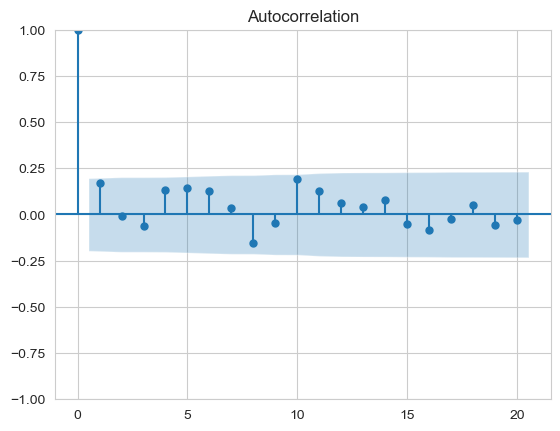

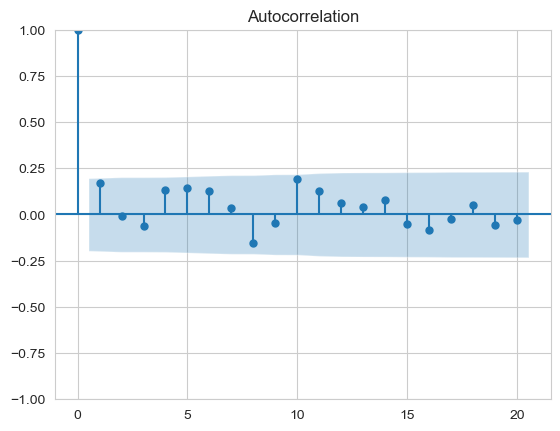

In [120]:
plot_acf(data)

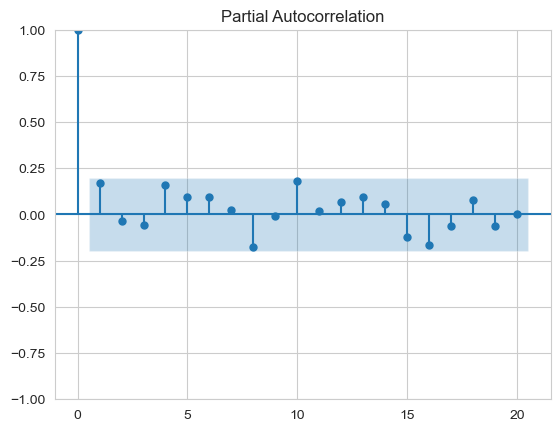

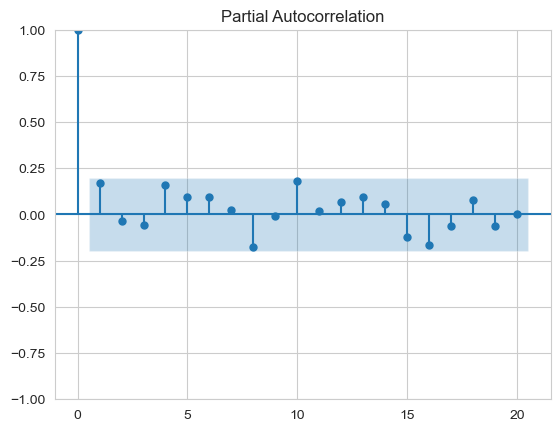

In [121]:
plot_pacf(data)

In [152]:
train, test = train_test_split(data, test_size = 0.2, shuffle = False)

In [167]:
model = ARIMA(train, order = (1, 0, 2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   80
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -552.587
Date:                Mon, 18 Nov 2024   AIC                           1115.173
Time:                        15:31:07   BIC                           1127.084
Sample:                             0   HQIC                          1119.949
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        574.6615     63.119      9.104      0.000     450.950     698.373
ar.L1          0.9336      0.105      8.898      0.000       0.728       1.139
ma.L1         -0.7189      0.168     -4.288      0.0

In [168]:
forecast = model_fit.forecast(steps = len(data))

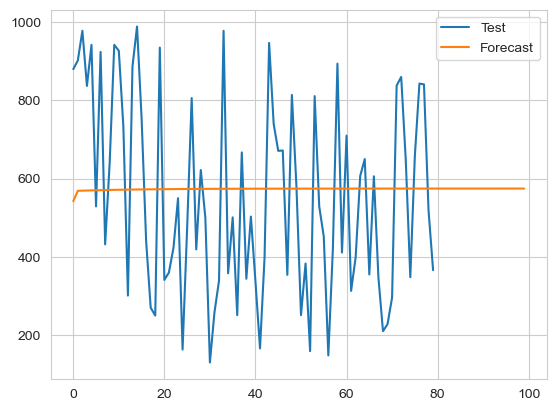

In [169]:
plt.plot(train, label = "Test")
plt.plot(forecast, label = "Forecast")
plt.legend()

In [172]:
stepwise_fit = auto_arima(train, trace=True, suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1105.572, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1134.712, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1124.098, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1100.554, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1132.747, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1101.597, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1101.452, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1099.210, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1100.349, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1100.199, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1122.162, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1102.185, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.742 seconds
                           

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   80
Model:                          ARIMA   Log Likelihood                -555.576
Date:                Mon, 18 Nov 2024   AIC                           1115.152
Time:                        15:33:51   BIC                           1119.916
Sample:                             0   HQIC                          1117.062
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        553.3000     28.770     19.232      0.000     496.911     609.689
sigma2      6.311e+04   1.64e+04      3.845      0.000    3.09e+04    9.53e+04
Ljung-Box (L1) (Q):                   4.45   Jarque-

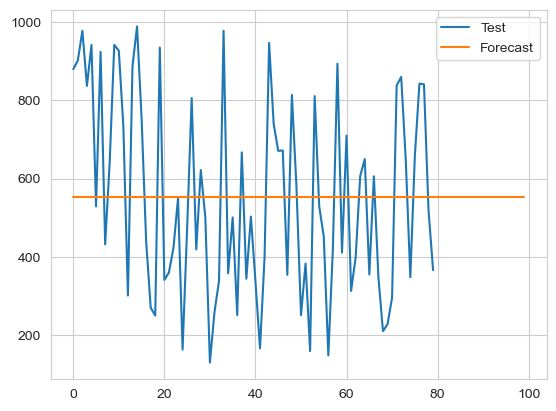

In [174]:
model = ARIMA(train, order = (0, 0, 0))
model_fit = model.fit()
print(model_fit.summary())

forecast = model_fit.forecast(steps = len(data))

plt.plot(train, label = "Test")
plt.plot(forecast, label = "Forecast")
plt.legend()